# 第六章 支持向量机


## 支持向量机 概述

支持向量机(Support Vector Machines, SVM)：是一种机器学习算法。 支持向量(Support Vector)就是离分隔超平面最近的那些点。 机(Machine)就是表示一种算法，而不是表示机器。

## 支持向量机 场景

要给左右两边的点进行分类
明显发现：选择D会比B、C分隔的效果要好很多。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536731105091_E4vm06ZS7S.jpg)

## 支持向量机 原理

### SVM 工作原理

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536731152547_YhpmzqD2Gh.jpg)

对于上述的苹果和香蕉，我们想象为2种水果类型的炸弹。（保证距离最近的炸弹，距离它们最远）

1. 寻找最大分类间距
2. 转而通过拉格朗日函数求优化的问题

3. 数据可以通过画一条直线就可以将它们完全分开，这组数据叫**线性可分(linearly separable)数据**，而这条分隔直线称为**分隔超平面(separating hyperplane)**。

4. 如果数据集上升到1024维呢？那么需要1023维来分隔数据集，也就说需要N-1维的对象来分隔，这个对象叫做**超平面(hyperlane)**，也就是分类的决策边界。

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536731217385_It1DfeWB0O.jpg)



## 寻找最大间隔

**为什么寻找最大间隔**

```
摘录地址：http://slideplayer.com/slide/8610144  (第12条信息)
Support Vector Machines: Slide 12 Copyright © 2001, 2003, Andrew W. Moore Why Maximum Margin? 
denotes +1 denotes -1 f(x,w,b) = sign(w. x - b) The maximum margin linear classifier is the linear classifier with the, um, maximum margin. 
This is the simplest kind of SVM (Called an LSVM) Support Vectors are those datapoints that the margin pushes up against 

1.Intuitively this feels safest. 
2.If we’ve made a small error in the location of the boundary (it’s been jolted in its perpendicular direction) this gives us least chance of causing a misclassification. 
3.CV is easy since the model is immune to removal of any non-support-vector datapoints. 
4.There’s some theory that this is a good thing. 
5.Empirically it works very very well. 

* * *

1. 直觉上是安全的
2. 如果我们在边界的位置发生了一个小错误（它在垂直方向上被颠倒），这给我们最小的错误分类机会。
3. CV（Computer Vision 计算机视觉 - 这缩写看着可怕）很容易，因为该模型对任何非支持向量数据点的去除是免疫的。
4. 有一些理论，这是一件好事。
5. 通常它的工作非常好。
```

**怎么寻找最大间隔**

> 点到超平面的距离

* 分隔超平面函数间距: $$y(x)=w^Tx+b$$
* 分类的结果： $$f(x)=sign(w^Tx+b)$$ (sign表示>0为1，<0为-1，=0为0)
* 点到超平面的几何间距: $$d(x)=(w^Tx+b)/||w|| $$（||w||表示w矩阵的二范式=>$$\sqrt{w∗w^T}$$, 点到超平面的距离也是类似的）

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536731491810_5buE3uKWyh.jpg)


> 拉格朗日乘子法

* 类别标签用-1、1，是为了后期方便$$label(w^Tx+b$$) 的标识和距离计算；如果 $$label(w^Tx+b)>0$$ 表示预测正确，否则预测错误。
* 现在目标很明确，就是要找到w和b，因此我们必须要找到最小间隔的数据点，也就是前面所说的支持向量。
    - 也就说，让最小的距离取最大.(最小的距离：就是最小间隔的数据点；最大：就是最大间距，为了找出最优超平面--最终就是支持向量)
    - 目标函数：$$(arg: max_{关于w, b} \left( min[label(w^Tx+b)]\frac{1}{||w||} \right) )$$
        - a. 如果 $$label∗(wTx+b)>0$$ 表示预测正确，也称函数间隔，||w|| 可以理解为归一化，也称几何间隔。
        - b. 令 $$(label(w^Tx+b)>=1)$$ 因为 0 ~ 1 之间，得到的点是存在误判的可能性，所以要保障 $$(min[label(w^Tx+b)]=1)$$，才能更好降低噪音数据影响。
        - c. 所以本质上是求 $$arg:max_{关于w,b} \frac{1}{||w||}$$；也就说，我们约束(前提)条件是: $$label∗(wTx+b)=1$$
        
* 新的目标函数求解：$$arg:max_{关于w,b}\frac{1}{||w||}$$
    * => 就是求:$$arg:min_{关于w,b}||w||$$ (求矩阵会比较麻烦，如果x只是$$1/2∗x^2$$的偏导数，那么。。同样是求最小值)
    * => 就是求:$$arg:min_{关于w,b}(\frac{1}{2}∗||w||^2)$$ (二次函数求导，求极值，平方也方便计算)
    * 本质上就是求线性不等式的二次优化问题(求分隔超平面，等价于求解相应的凸二次规划问题)

* 通过拉格朗日乘子法，求二次优化问题
    * 假设需要求极值的目标函数 (objective function) 为 f(x,y)，限制条件为 φ(x,y)=M # M=1
    * 设g(x,y)=M-φ(x,y) # 临时φ(x,y)表示下文中 $$label∗(w^Tx+b)$$
    * 定义一个新函数: F(x,y,λ)=f(x,y)+λg(x,y)a为λ（a>=0），代表要引入的拉格朗日乘子(Lagrange multiplier)
    * 那么： $$L(w,b,α)=\frac{1}{2}||w||^2 +\sum^n_{i=1}α_i∗[1−label∗(w^Tx+b)]$$因为：$$(label(w^Tx+b)>=1, \alpha>=0)$$, 所以$$(\alpha[1-label(w^Tx+b)] \lt = 0)$$,    
    
    $$\sum_{i=1}^{n} \alpha_i * [1-label(w^Tx+b)] \lt = 0$$
    * 相当于求解: $$max_{关于α}L(w,b,α)=\frac{1}{2}∗||w||^2$$
    * 如果求：$$min_{关于w,b}\frac{1}{2}∗||w||^2$$, 也就是要求：$$min_{关于w,b}(max_{关于α}L(w,b,α))$$

* 现在转化到对偶问题的求解
    * $$min_{关于w,b}(max_{关于α}L(w,b,α)) >= max_{关于α}(min_{关于w,b}L(w,b,α))$$
    * 现在分2步
    * 先求$$min_{关于w,b}L(w,b,α)=\frac{1}{2}∗||w||^2+\sum^n_{i=1}\alpha_i∗[1−label∗(w^Tx+b)]$$
    * 就是求L(w,b,α)关于[w, b]的偏导数, 得到w和b的值，并化简为：L和α的方程。
    * 参考： 如果公式推导还是不懂，也可以参考《统计学习方法》李航-P103<学习的对偶算法> 
    ![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536735217420_rrMKAzyTNw.jpg)
    * 终于得到课本上的公式： $$(max_{关于\alpha} \left( \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i, j=1}^{m} label_i·label_j·\alpha_i·\alpha_j· \right))$$
    * 约束条件： a>=0 并且 $$\sum^m_{i=1}\alpha_i·label_i=0$$

> 松弛变量(slack variable)

参考地址：http://blog.csdn.net/wusecaiyun/article/details/49659183

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536736166248_aKeHpVc8Fh.jpg)

* 我们知道几乎所有的数据都不那么干净, 通过引入松弛变量来 允许数据点可以处于分隔面错误的一侧。
* 约束条件： $$(C>=a>=0)$$ 并且 $$(\sum_{i=1}^{m} a_i·label_i=0)$$
* 总的来说：
    * ![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536737104267_bJXPy3O6jR.jpg)表示松弛变量
    * 常量C是离群点的权重（用于控制“最大化间隔”和“保证大部分点的函数间隔小于1.0” ）
    * C值越大，表示离群点影响越大，就越容易过度拟合；反之有可能欠拟合。
    * 我们看到，目标函数控制了离群点的数目和程度，使大部分样本点仍然遵守限制条件。
    * 例如：正类有10000个样本，而负类只给了100个（C越大表示100个负样本的影响越大，就会出现过度拟合，所以C决定了负样本对模型拟合程度的影响！，C就是一个非常关键的优化点！）
* 这一结论十分直接，SVM中的主要工作就是要求解 alpha.

## SMO 高效优化算法

SVM有很多种实现，最流行的一种实现是： 序列最小优化(Sequential Minimal Optimization, SMO)算法。

下面还会介绍一种称为 核函数(kernel) 的方式将SVM扩展到更多数据集上。

注意：SVM几何含义比较直观，但其算法实现较复杂，牵扯大量数学公式的推导。

### 序列最小优化(Sequential Minimal Optimization, SMO)

创建作者：John Platt

创建时间：1996年

SMO用途：用于训练 SVM

SMO目标：求出一系列 alpha 和 b,一旦求出 alpha，就很
容易计算出权重向量 w 并得到分隔超平面。

SMO思想：是将大优化问题分解为多个小优化问题来求解的。

SMO原理：每次循环选择两个 alpha 进行优化处理，一旦找出一对合适的 alpha，那么就增大一个同时减少一个。
* 这里指的合适必须要符合一定的条件
    * 这两个 alpha 必须要在间隔边界之外
    * 这两个 alpha 还没有进行过区间化处理或者不在边界上。
* 之所以要同时改变2个 alpha；原因是我们有一个约束条件： $$\sum_{i=1}^m \alpha_i * label_i = 0$$；如果只是修改一个 alpha，很可能导致约束条件失效。

> SMO 伪代码大致如下：

```
创建一个 alpha 向量并将其初始化为0向量
当迭代次数小于最大迭代次数时(外循环)
    对数据集中的每个数据向量(内循环)：
        如果该数据向量可以被优化
            随机选择另外一个数据向量
            同时优化这两个向量
            如果两个向量都不能被优化，退出内循环
    如果所有向量都没被优化，增加迭代数目，继续下一次循环
```

### SVM 开发流程

* 收集数据：可以使用任意方法。
* 准备数据：需要数值型数据。
* 分析数据：有助于可视化分隔超平面。
* 训练算法：SVM的大部分时间都源自训练，该过程主要实现两个参数的调优。
* 测试算法：十分简单的计算过程就可以实现。
* 使用算法：几乎所有分类问题都可以使用SVM，值得一提的是，SVM本身是一个二类分类器，对多类问题应用SVM需要对代码做一些修改。

### SVM 算法特点

* 优点：泛化（由具体的、个别的扩大为一般的，就是说：模型训练完后的新样本）错误率低，计算开销不大，结果易理解。
* 缺点：对参数调节和核函数的选择敏感，原始分类器不加修改仅适合于处理二分类问题。
* 使用数据类型：数值型和标称型数据。


### 课本案例（无核函数）

**项目概述** 

对小规模数据点进行分类

**开发流程**

> 收集数据

文本文件格式：

```
3.542485    1.977398    -1
3.018896    2.556416    -1
7.551510    -1.580030   1
2.114999    -0.004466   -1
8.127113    1.274372    1
```

> 准备数据

In [1]:
def loadDataSet(fileName):
    """
    对文件进行逐行解析，从而得到第行的类标签和整个特征矩阵
    Args:
        fileName 文件名
    Returns:
        dataMat  特征矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

> 分析数据: 无  
> 训练算法

In [2]:
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    """smoSimple

    Args:
        dataMatIn    特征集合
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率（是指在某个体系中能减小一些因素或选择对某个系统产生不稳定的概率。）
        maxIter 退出前最大的循环次数
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """
    dataMatrix = mat(dataMatIn)
    # 矩阵转置 和 .T 一样的功能
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)

    # 初始化 b和alphas(alpha有点类似权重值。)
    b = 0
    alphas = mat(zeros((m, 1)))

    # 没有任何alpha改变的情况下遍历数据的次数
    iter = 0
    while (iter < maxIter):
        # w = calcWs(alphas, dataMatIn, classLabels)
        # print("w:", w)

        # 记录alpha是否已经进行优化，每次循环时设为0，然后再对整个集合顺序遍历
        alphaPairsChanged = 0
        for i in range(m):
            # print 'alphas=', alphas
            # print 'labelMat=', labelMat
            # print 'multiply(alphas, labelMat)=', multiply(alphas, labelMat)
            # 我们预测的类别 y[i] = w^Tx[i]+b; 其中因为 w = Σ(1~n) a[n]*lable[n]*x[n]
            fXi = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[i, :].T)) + b
            # 预测结果与真实结果比对，计算误差Ei
            Ei = fXi - float(labelMat[i])

            # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
            # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
            # 表示发生错误的概率：labelMat[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
            '''
            # 检验训练样本(xi, yi)是否满足KKT条件
            yi*f(i) >= 1 and alpha = 0 (outside the boundary)
            yi*f(i) == 1 and 0<alpha< C (on the boundary)
            yi*f(i) <= 1 and alpha = C (between the boundary)
            '''
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):

                # 如果满足优化的条件，我们就随机选取非i的一个点，进行优化比较
                j = selectJrand(i, m)
                # 预测j的结果
                fXj = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()

                # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接执行continue语句
                # labelMat[i] != labelMat[j] 表示异侧，就相减，否则是同侧，就相加。
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                # 如果相同，就没发优化了
                if L == H:
                    print("L==H")
                    continue

                # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
                # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
                eta = 2.0 * dataMatrix[i, :]*dataMatrix[j, :].T - dataMatrix[i, :]*dataMatrix[i, :].T - dataMatrix[j, :]*dataMatrix[j, :].T
                if eta >= 0:
                    print("eta>=0")
                    continue

                # 计算出一个新的alphas[j]值
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                # 并使用辅助函数，以及L和H对其进行调整
                alphas[j] = clipAlpha(alphas[j], H, L)
                # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    print("j not moving enough")
                    continue
                # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
                # w= Σ[1~n] ai*yi*xi => b = yj- Σ[1~n] ai*yi(xi*xj)
                # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
                # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[i, :].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i, :]*dataMatrix[j, :].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[j, :].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j, :]*dataMatrix[j, :].T
                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
        # 在for循环外，检查alpha值是否做了更新，如果在更新则将iter设为0后继续运行程序
        # 知道更新完毕后，iter次循环无变化，才推出循环。
        if (alphaPairsChanged == 0):
            iter += 1
        else:
            iter = 0
        print("iteration number: %d" % iter)
    return b, alphas

iter: 0 i:0, pairs changed 1
L==H
iter: 0 i:4, pairs changed 2
L==H
L==H
L==H
iter: 0 i:11, pairs changed 3
iter: 0 i:15, pairs changed 4
iter: 0 i:17, pairs changed 5
iter: 0 i:18, pairs changed 6
L==H
L==H
L==H
iter: 0 i:48, pairs changed 7
L==H
iter: 0 i:54, pairs changed 8
L==H
L==H
L==H
L==H
L==H
iteration number: 0
L==H
iter: 0 i:11, pairs changed 1
iter: 0 i:18, pairs changed 2
L==H
L==H
L==H
L==H
L==H
iter: 0 i:43, pairs changed 3
L==H
iter: 0 i:55, pairs changed 4
L==H
iter: 0 i:64, pairs changed 5
iter: 0 i:69, pairs changed 6
iter: 0 i:83, pairs changed 7
iteration number: 0
iter: 0 i:0, pairs changed 1
L==H
L==H
iter: 0 i:47, pairs changed 2
L==H
iter: 0 i:62, pairs changed 3
iter: 0 i:70, pairs changed 4
L==H
L==H
L==H
L==H
iteration number: 0
iter: 0 i:0, pairs changed 1
iter: 0 i:4, pairs changed 2
L==H
L==H
L==H
iter: 0 i:17, pairs changed 3
L==H
L==H
L==H
L==H
L==H
L==H
iter: 0 i:46, pairs changed 4
iter: 0 i:47, pairs changed 5
iter: 0 i:54, pairs changed 6
iter: 0 i:

iteration number: 3
iter: 3 i:55, pairs changed 1
iteration number: 0
L==H
iteration number: 1
L==H
iteration number: 2
iteration number: 3
iteration number: 4
L==H
iteration number: 5
iteration number: 6
L==H
iteration number: 7
L==H
iteration number: 8
iteration number: 9
iteration number: 10
iter: 10 i:29, pairs changed 1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 10
iteration number: 11
iter: 11 i:17, pairs changed 1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 10
iteration number: 11
iteration number: 12
iteration number: 13
iteration number: 14
iteration number: 15
iteration number: 16
iteration number: 17
iteration number: 18
iteration n

iteration number: 13
iteration number: 14
iteration number: 15
iteration number: 16
iteration number: 17
iteration number: 18
iteration number: 19
iter: 19 i:17, pairs changed 1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 10
iteration number: 11
iteration number: 12
iteration number: 13
iteration number: 14
iteration number: 15
iteration number: 16
iter: 16 i:55, pairs changed 1
iteration number: 0
iter: 0 i:29, pairs changed 1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 10
iteration number: 11
iteration number: 12
iteration number: 13
iteration number: 14
iteration number: 15
iteration number: 16
iteration number: 17
iteration number: 18
itera

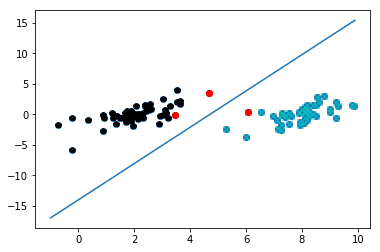

In [4]:
#完整代码：SVM简化版，应用简化版SMO算法处理小规模数据集: 
#!/usr/bin/python
# -*- coding:utf-8 -*-

from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline


def loadDataSet(fileName):
    """
    对文件进行逐行解析，从而得到第行的类标签和整个特征矩阵
    Args:
        fileName 文件名
    Returns:
        dataMat  特征矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat


def selectJrand(i, m):
    """
    随机选择一个整数
    Args:
        i  第一个alpha的下标
        m  所有alpha的数目
    Returns:
        j  返回一个不为i的随机数，在0~m之间的整数值
    """
    j = i
    while j == i:
        j = int(random.uniform(0, m))
    return j


def clipAlpha(aj, H, L):
    """clipAlpha(调整aj的值，使aj处于 L<=aj<=H)
    Args:
        aj  目标值
        H   最大值
        L   最小值
    Returns:
        aj  目标值
    """
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj


def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    """smoSimple

    Args:
        dataMatIn    数据集
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率（是指在某个体系中能减小一些因素或选择对某个系统产生不稳定的概率。）
        maxIter 退出前最大的循环次数
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """
    dataMatrix = mat(dataMatIn)
    # 矩阵转置 和 .T 一样的功能
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)

    # 初始化 b和alphas(alpha有点类似权重值。)
    b = 0
    alphas = mat(zeros((m, 1)))

    # 没有任何alpha改变的情况下遍历数据的次数
    iter = 0
    while (iter < maxIter):
        # w = calcWs(alphas, dataMatIn, classLabels)
        # print("w:", w)

        # 记录alpha是否已经进行优化，每次循环时设为0，然后再对整个集合顺序遍历
        alphaPairsChanged = 0
        for i in range(m):
            # print('alphas=', alphas)
            # print('labelMat=', labelMat)
            # print('multiply(alphas, labelMat)=', multiply(alphas, labelMat))
            # 我们预测的类别 y = w^Tx[i]+b; 其中因为 w = Σ(1~n) a[n]*lable[n]*x[n]
            fXi = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[i, :].T)) + b
            # 预测结果与真实结果比对，计算误差Ei
            Ei = fXi - float(labelMat[i])

            # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
            # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
            # 表示发生错误的概率：labelMat[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
            '''
            # 检验训练样本(xi, yi)是否满足KKT条件
            yi*f(i) >= 1 and alpha = 0 (outside the boundary)
            yi*f(i) == 1 and 0<alpha< C (on the boundary)
            yi*f(i) <= 1 and alpha = C (between the boundary)
            '''
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):

                # 如果满足优化的条件，我们就随机选取非i的一个点，进行优化比较
                j = selectJrand(i, m)
                # 预测j的结果
                fXj = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()

                # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接执行continue语句
                # labelMat[i] != labelMat[j] 表示异侧，就相减，否则是同侧，就相加。
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                # 如果相同，就没发优化了
                if L == H:
                    print("L==H")
                    continue

                # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
                # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
                eta = 2.0 * dataMatrix[i, :]*dataMatrix[j, :].T - dataMatrix[i, :]*dataMatrix[i, :].T - dataMatrix[j, :]*dataMatrix[j, :].T
                if eta >= 0:
                    print("eta>=0")
                    continue

                # 计算出一个新的alphas[j]值
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                # 并使用辅助函数，以及L和H对其进行调整
                alphas[j] = clipAlpha(alphas[j], H, L)
                # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    #print("j not moving enough")
                    continue
                # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
                # w= Σ[1~n] ai*yi*xi => b = yj- Σ[1~n] ai*yi(xi*xj)
                # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
                # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[i, :].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i, :]*dataMatrix[j, :].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[j, :].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j, :]*dataMatrix[j, :].T
                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
        # 在for循环外，检查alpha值是否做了更新，如果在更新则将iter设为0后继续运行程序
        # 知道更新完毕后，iter次循环无变化，才推出循环。
        if (alphaPairsChanged == 0):
            iter += 1
        else:
            iter = 0
        print("iteration number: %d" % iter)
    return b, alphas


def calcWs(alphas, dataArr, classLabels):
    """
    基于alpha计算w值
    Args:
        alphas        拉格朗日乘子
        dataArr       feature数据集
        classLabels   目标变量数据集

    Returns:
        wc  回归系数
    """
    X = mat(dataArr)
    labelMat = mat(classLabels).transpose()
    m, n = shape(X)
    w = zeros((n, 1))
    for i in range(m):
        w += multiply(alphas[i] * labelMat[i], X[i, :].T)
    return w


def plotfig_SVM(xMat, yMat, ws, b, alphas):
    """
    参考地址：
       http://blog.csdn.net/maoersong/article/details/24315633
       http://www.cnblogs.com/JustForCS/p/5283489.html
       http://blog.csdn.net/kkxgx/article/details/6951959
    """

    xMat = mat(xMat)
    yMat = mat(yMat)

    # b原来是矩阵，先转为数组类型后其数组大小为（1,1），所以后面加[0]，变为(1,)
    b = array(b)[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 注意flatten的用法
    ax.scatter(xMat[:, 0].flatten().A[0], xMat[:, 1].flatten().A[0])

    # x最大值，最小值根据原数据集dataArr[:, 0]的大小而定
    x = arange(-1.0, 10.0, 0.1)

    # 根据x.w + b = 0 得到，其式子展开为w0.x1 + w1.x2 + b = 0, x2就是y值
    y = (-b-ws[0, 0]*x)/ws[1, 0]
    ax.plot(x, y)

    for i in range(shape(yMat[0, :])[1]):
        if yMat[0, i] > 0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'cx')
        else:
            ax.plot(xMat[i, 0], xMat[i, 1], 'kp')

    # 找到支持向量，并在图中标红
    for i in range(100):
        if alphas[i] > 0.0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'ro')
    plt.show()


if __name__ == "__main__":
    # 获取特征和目标变量
    dataArr, labelArr = loadDataSet('./dataset/testSet.txt')
    # print(labelArr)

    # b是常量值， alphas是拉格朗日乘子
    b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)
    print('/n/n/n')
    print('b=', b)
    print('alphas[alphas>0]=', alphas[alphas > 0])
    print('shape(alphas[alphas > 0])=', shape(alphas[alphas > 0]))
    for i in range(100):
        if alphas[i] > 0:
            print(dataArr[i], labelArr[i])
    # 画图
    ws = calcWs(alphas, dataArr, labelArr)
    plotfig_SVM(dataArr, labelArr, ws, b, alphas)


fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 2
fullSet, iter: 0 i:3, pairs changed 3
fullSet, iter: 0 i:4, pairs changed 4
fullSet, iter: 0 i:5, pairs changed 4
fullSet, iter: 0 i:6, pairs changed 4
fullSet, iter: 0 i:7, pairs changed 4
j not moving enough
fullSet, iter: 0 i:8, pairs changed 4
fullSet, iter: 0 i:9, pairs changed 4
j not moving enough
fullSet, iter: 0 i:10, pairs changed 4
j not moving enough
fullSet, iter: 0 i:11, pairs changed 4
fullSet, iter: 0 i:12, pairs changed 4
fullSet, iter: 0 i:13, pairs changed 4
fullSet, iter: 0 i:14, pairs changed 4
fullSet, iter: 0 i:15, pairs changed 4
fullSet, iter: 0 i:16, pairs changed 4
j not moving enough
fullSet, iter: 0 i:17, pairs changed 4
fullSet, iter: 0 i:18, pairs changed 5
fullSet, iter: 0 i:19, pairs changed 5
fullSet, iter: 0 i:20, pairs changed 5
fullSet, iter: 0 i:21, pairs changed 5
fullSet, iter: 0 i:22, pairs changed 5
fullSet, iter: 0 i:23, pairs chan

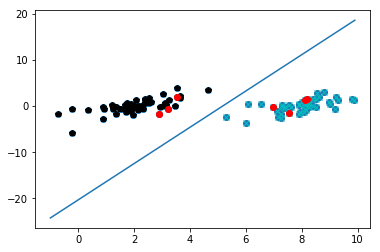

In [5]:
#完整代码：SVM完整版，使用完整 Platt SMO算法加速优化，优化点：选择alpha的方式不同: 
#!/usr/bin/python
# -*- coding:utf-8 -*-


from numpy import *
import matplotlib.pyplot as plt


class optStruct:
    def __init__(self, dataMatIn, classLabels, C, toler):  # Initialize the structure with the parameters
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m, 1)))
        self.b = 0
        self.eCache = mat(zeros((self.m, 2)))  # first column is valid flag


def loadDataSet(fileName):
    """loadDataSet（对文件进行逐行解析，从而得到第行的类标签和整个数据矩阵）

    Args:
        fileName 文件名
    Returns:
        dataMat  数据矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat


def selectJrand(i, m):
    """
    随机选择一个整数
    Args:
        i  第一个alpha的下标
        m  所有alpha的数目
    Returns:
        j  返回一个不为i的随机数，在0~m之间的整数值
    """
    j = i
    while j == i:
        j = random.randint(0, m - 1)
    return j


def clipAlpha(aj, H, L):
    """clipAlpha(调整aj的值，使aj处于 L<=aj<=H)
    Args:
        aj  目标值
        H   最大值
        L   最小值
    Returns:
        aj  目标值
    """
    aj = min(aj, H)
    aj = max(L, aj)
    return aj


def calcEk(oS, k):
    """calcEk（求 Ek误差：预测值-真实值的差）

    该过程在完整版的SMO算法中陪出现次数较多，因此将其单独作为一个方法
    Args:
        oS  optStruct对象
        k   具体的某一行

    Returns:
        Ek  预测结果与真实结果比对，计算误差Ek
    """
    fXk = multiply(oS.alphas, oS.labelMat).T * (oS.X * oS.X[k].T) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek


def selectJ(i, oS, Ei):  # this is the second choice -heurstic, and calcs Ej
    """selectJ（返回最优的j和Ej）

    内循环的启发式方法。
    选择第二个(内循环)alpha的alpha值
    这里的目标是选择合适的第二个alpha值以保证每次优化中采用最大步长。
    该函数的误差与第一个alpha值Ei和下标i有关。
    Args:
        i   具体的第i一行
        oS  optStruct对象
        Ei  预测结果与真实结果比对，计算误差Ei

    Returns:
        j  随机选出的第j一行
        Ej 预测结果与真实结果比对，计算误差Ej
    """
    maxK = -1
    maxDeltaE = 0
    Ej = 0
    # 首先将输入值Ei在缓存中设置成为有效的。这里的有效意味着它已经计算好了。
    oS.eCache[i] = [1, Ei]

    # print('oS.eCache[%s]=%s' % (i, oS.eCache[i]))
    # print('oS.eCache[:, 0].A=%s' % oS.eCache[:, 0].A.T)
    # """
    # # 返回非0的：行列值
    # nonzero(oS.eCache[:, 0].A)= (
    #     行： array([ 0,  2,  4,  5,  8, 10, 17, 18, 20, 21, 23, 25, 26, 29, 30, 39, 46,52, 54, 55, 62, 69, 70, 76, 79, 82, 94, 97]),
    #     列： array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0])
    # )
    # """
    # print('nonzero(oS.eCache[:, 0].A)=', nonzero(oS.eCache[:, 0].A))
    # # 取行的list
    # print('nonzero(oS.eCache[:, 0].A)[0]=', nonzero(oS.eCache[:, 0].A)[0])
    # 非零E值的行的list列表，所对应的alpha值
    validEcacheList = nonzero(oS.eCache[:, 0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:  # 在所有的值上进行循环，并选择其中使得改变最大的那个值
            if k == i:
                continue  # don't calc for i, waste of time

            # 求 Ek误差：预测值-真实值的差
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if deltaE > maxDeltaE:
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej
    else:  # 如果是第一次循环，则随机选择一个alpha值
        j = selectJrand(i, oS.m)

        # 求 Ek误差：预测值-真实值的差
        Ej = calcEk(oS, j)
    return j, Ej


def updateEk(oS, k):  # after any alpha has changed update the new value in the cache
    """updateEk（计算误差值并存入缓存中。）

    在对alpha值进行优化之后会用到这个值。
    Args:
        oS  optStruct对象
        k   某一列的行号
    """

    # 求 误差：预测值-真实值的差
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]


def innerL(i, oS):
    """innerL
    内循环代码
    Args:
        i   具体的某一行
        oS  optStruct对象

    Returns:
        0   找不到最优的值
        1   找到了最优的值，并且oS.Cache到缓存中
    """

    # 求 Ek误差：预测值-真实值的差
    Ei = calcEk(oS, i)

    # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
    # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
    # 表示发生错误的概率：labelMat[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
    '''
    # 检验训练样本(xi, yi)是否满足KKT条件
    yi*f(i) >= 1 and alpha = 0 (outside the boundary)
    yi*f(i) == 1 and 0<alpha< C (on the boundary)
    yi*f(i) <= 1 and alpha = C (between the boundary)
    '''
    if ((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        # 选择最大的误差对应的j进行优化。效果更明显
        j, Ej = selectJ(i, oS, Ei)
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()

        # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接return 0
        if oS.labelMat[i] != oS.labelMat[j]:
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            print("L==H")
            return 0

        # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
        # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
        eta = oS.X[i] - oS.X[j]
        eta = - eta * eta.T
        if eta >= 0:
            print("eta>=0")
            return 0

        # 计算出一个新的alphas[j]值
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej) / eta
        # 并使用辅助函数，以及L和H对其进行调整
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        # 更新误差缓存
        updateEk(oS, j)

        # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            print("j not moving enough")
            return 0

        # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
        oS.alphas[i] += oS.labelMat[j] * oS.labelMat[i] * (alphaJold - oS.alphas[j])
        # 更新误差缓存
        updateEk(oS, i)

        # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
        # w= Σ[1~n] ai*yi*xi => b = yj Σ[1~n] ai*yi(xi*xj)
        # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
        # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
        b1 = oS.b - Ei - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.X[i] * oS.X[i].T - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.X[i] * oS.X[j].T
        b2 = oS.b - Ej - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.X[i] * oS.X[j].T - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.X[j] * oS.X[j].T
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]):
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2) / 2
        return 1
    else:
        return 0


def smoP(dataMatIn, classLabels, C, toler, maxIter):
    """
    完整SMO算法外循环，与smoSimple有些类似，但这里的循环退出条件更多一些
    Args:
        dataMatIn    数据集
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率
        maxIter 退出前最大的循环次数
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """

    # 创建一个 optStruct 对象
    oS = optStruct(mat(dataMatIn), mat(classLabels).transpose(), C, toler)
    iter = 0
    entireSet = True
    alphaPairsChanged = 0

    # 循环遍历：循环maxIter次 并且 （alphaPairsChanged存在可以改变 or 所有行遍历一遍）
    # 循环迭代结束 或者 循环遍历所有alpha后，alphaPairs还是没变化
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        # ----------- 第一种写法 start -------------------------
        #  当entireSet=true or 非边界alpha对没有了；就开始寻找 alpha对，然后决定是否要进行else。
        if entireSet:
            # 在数据集上遍历所有可能的alpha
            for i in range(oS.m):
                # 是否存在alpha对，存在就+1
                alphaPairsChanged += innerL(i, oS)
                print("fullSet, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1
        # 对已存在 alpha对，选出非边界的alpha值，进行优化。
        else:
            # 遍历所有的非边界alpha值，也就是不在边界0或C上的值。
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                print("non-bound, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1
        # ----------- 第一种写法 end -------------------------

        # ----------- 第二种方法 start -------------------------
        # if entireSet:																				#遍历整个数据集
    	# 	alphaPairsChanged += sum(innerL(i, oS) for i in range(oS.m))
		# else: 																						#遍历非边界值
		# 	nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]						#遍历不在边界0和C的alpha
		# 	alphaPairsChanged += sum(innerL(i, oS) for i in nonBoundIs)
		# iter += 1
        # ----------- 第二种方法 end -------------------------
        # 如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if entireSet:
            entireSet = False  # toggle entire set loop
        elif alphaPairsChanged == 0:
            entireSet = True
        print("iteration number: %d" % iter)
    return oS.b, oS.alphas


def calcWs(alphas, dataArr, classLabels):
    """
    基于alpha计算w值
    Args:
        alphas        拉格朗日乘子
        dataArr       feature数据集
        classLabels   目标变量数据集

    Returns:
        wc  回归系数
    """
    X = mat(dataArr)
    labelMat = mat(classLabels).T
    m, n = shape(X)
    w = zeros((n, 1))
    for i in range(m):
        w += multiply(alphas[i] * labelMat[i], X[i].T)
    return w


def plotfig_SVM(xArr, yArr, ws, b, alphas):
    """
    参考地址：
       http://blog.csdn.net/maoersong/article/details/24315633
       http://www.cnblogs.com/JustForCS/p/5283489.html
       http://blog.csdn.net/kkxgx/article/details/6951959
    """

    xMat = mat(xArr)
    yMat = mat(yArr)

    # b原来是矩阵，先转为数组类型后其数组大小为（1,1），所以后面加[0]，变为(1,)
    b = array(b)[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 注意flatten的用法
    ax.scatter(xMat[:, 0].flatten().A[0], xMat[:, 1].flatten().A[0])

    # x最大值，最小值根据原数据集dataArr[:, 0]的大小而定
    x = arange(-1.0, 10.0, 0.1)

    # 根据x.w + b = 0 得到，其式子展开为w0.x1 + w1.x2 + b = 0, x2就是y值
    y = (- b - ws[0, 0] * x) / ws[1, 0]
    ax.plot(x, y)

    for i in range(shape(yMat[0])[1]):
        if yMat[0, i] > 0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'cx')
        else:
            ax.plot(xMat[i, 0], xMat[i, 1], 'kp')

    # 找到支持向量，并在图中标红
    for i in range(100):
        if alphas[i] > 0.0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'ro')
    plt.show()


if __name__ == "__main__":
    # 获取特征和目标变量
    dataArr, labelArr = loadDataSet('./dataset/testSet.txt')
    # print(labelArr)

    # b是常量值， alphas是拉格朗日乘子
    b, alphas = smoP(dataArr, labelArr, 0.6, 0.001, 40)
    print('/n/n/n')
    print('b=', b)
    print('alphas[alphas>0]=', alphas[alphas > 0])
    print('shape(alphas[alphas > 0])=', shape(alphas[alphas > 0]))
    for i in range(100):
        if alphas[i] > 0:
            print(dataArr[i], labelArr[i])
    # 画图
    ws = calcWs(alphas, dataArr, labelArr)
    plotfig_SVM(dataArr, labelArr, ws, b, alphas)


## 核函数(kernel) 使用

对于线性可分的情况，效果明显

对于非线性的情况也一样，此时需要用到一种叫核函数(kernel)的工具将数据转化为分类器易于理解的形式。

> 利用核函数将数据映射到高维空间

使用核函数：可以将数据从某个特征空间到另一个特征空间的映射。（通常情况下：这种映射会将低维特征空间映射到高维空间。）

如果觉得特征空间很装逼、很难理解。
可以把核函数想象成一个包装器(wrapper)或者是接口(interface)，它能将数据从某个很难处理的形式转换成为另一个较容易处理的形式。

经过空间转换后：低维需要解决的非线性问题，就变成了高维需要解决的线性问题。

SVM 优化特别好的地方，在于所有的运算都可以写成内积(inner product: 是指2个向量相乘，得到单个标量 或者 数值)；内积替换成核函数的方式被称为核技巧(kernel trick)或者核"变电"(kernel substation)

核函数并不仅仅应用于支持向量机，很多其他的机器学习算法也都用到核函数。最流行的核函数：径向基函数(radial basis function)

径向基函数的高斯版本，其具体的公式为：





### 项目案例: 手写数字识别的优化（有核函数）

**项目概述**

你的老板要求：你写的那个手写识别程序非常好，但是它占用内存太大。顾客无法通过无线的方式下载我们的应用。
所以：我们可以考虑使用支持向量机，保留支持向量就行（knn需要保留所有的向量），就可以获得非常好的效果。

**开发流程**

> 收集数据：提供的文本文件

```
00000000000000001111000000000000
00000000000000011111111000000000
00000000000000011111111100000000
00000000000000011111111110000000
00000000000000011111111110000000
00000000000000111111111100000000
00000000000000111111111100000000
00000000000001111111111100000000
00000000000000111111111100000000
00000000000000111111111100000000
00000000000000111111111000000000
00000000000001111111111000000000
00000000000011111111111000000000
00000000000111111111110000000000
00000000001111111111111000000000
00000001111111111111111000000000
00000011111111111111110000000000
00000111111111111111110000000000
00000111111111111111110000000000
00000001111111111111110000000000
00000001111111011111110000000000
00000000111100011111110000000000
00000000000000011111110000000000
00000000000000011111100000000000
00000000000000111111110000000000
00000000000000011111110000000000
00000000000000011111110000000000
00000000000000011111111000000000
00000000000000011111111000000000
00000000000000011111111000000000
00000000000000000111111110000000
00000000000000000111111100000000
```

> 准备数据：基于二值图像构造向量

将 32\*32的文本转化为 1\*1024的矩阵




In [7]:
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

def loadImages(dirName):
    from os import listdir
    hwLabels = []
    print(dirName)
    trainingFileList = listdir(dirName)  # load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9:
            hwLabels.append(-1)
        else:
            hwLabels.append(1)
        trainingMat[i, :] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels
#分析数据：对图像向量进行目测

#训练算法：采用两种不同的核函数，并对径向基核函数采用不同的设置来运行SMO算法


def kernelTrans(X, A, kTup):  # calc the kernel or transform data to a higher dimensional space
    """
    核转换函数
    Args:
        X     dataMatIn数据集
        A     dataMatIn数据集的第i行的数据
        kTup  核函数的信息

    Returns:

    """
    m, n = shape(X)
    K = mat(zeros((m, 1)))
    if kTup[0] == 'lin':
        # linear kernel:   m*n * n*1 = m*1
        K = X * A.T
    elif kTup[0] == 'rbf':
        for j in range(m):
            deltaRow = X[j, :] - A
            K[j] = deltaRow * deltaRow.T
        # 径向基函数的高斯版本
        K = exp(K / (-1 * kTup[1] ** 2))  # divide in NumPy is element-wise not matrix like Matlab
    else:
        raise NameError('Houston We Have a Problem -- That Kernel is not recognized')
    return K

def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup=('lin', 0)):
    """
    完整SMO算法外循环，与smoSimple有些类似，但这里的循环退出条件更多一些
    Args:
        dataMatIn    数据集
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率
        maxIter 退出前最大的循环次数
        kTup    包含核函数信息的元组
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """

    # 创建一个 optStruct 对象
    oS = optStruct(mat(dataMatIn), mat(classLabels).transpose(), C, toler, kTup)
    iter = 0
    entireSet = True
    alphaPairsChanged = 0

    # 循环遍历：循环maxIter次 并且 （alphaPairsChanged存在可以改变 or 所有行遍历一遍）
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0

        #  当entireSet=true or 非边界alpha对没有了；就开始寻找 alpha对，然后决定是否要进行else。
        if entireSet:
            # 在数据集上遍历所有可能的alpha
            for i in range(oS.m):
                # 是否存在alpha对，存在就+1
                alphaPairsChanged += innerL(i, oS)
                # print("fullSet, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1

        # 对已存在 alpha对，选出非边界的alpha值，进行优化。
        else:
            # 遍历所有的非边界alpha值，也就是不在边界0或C上的值。
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                # print("non-bound, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1

        # 如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if entireSet:
            entireSet = False  # toggle entire set loop
        elif (alphaPairsChanged == 0):
            entireSet = True
        print("iteration number: %d" % iter)
    return oS.b, oS.alphas

> 测试算法：便携一个函数来测试不同的和函数并计算错误率




In [ ]:
def testDigits(kTup=('rbf', 10)):

    # 1. 导入训练数据
    dataArr, labelArr = loadImages('input/6.SVM/trainingDigits')
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    svInd = nonzero(alphas.A > 0)[0]
    sVs = datMat[svInd]
    labelSV = labelMat[svInd]
    # print("there are %d Support Vectors" % shape(sVs)[0])
    m, n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], kTup)
        # 1*m * m*1 = 1*1 单个预测结果
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr[i]): errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / m))

    # 2. 导入测试数据
    dataArr, labelArr = loadImages('input/6.SVM/testDigits')
    errorCount = 0
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    m, n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], kTup)
        # 1*m * m*1 = 1*1 单个预测结果
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr[i]): errorCount += 1
    print("the test error rate is: %f" % (float(errorCount) / m))